In [16]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

def set_seed(seed):
    """Set the random seed for reproducibility."""
    np.random.seed(seed)


set_seed(42)
pd.set_option("display.max_columns", None)

In [17]:
diabetic = pd.read_csv("data/diabetic.csv")
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency


In [18]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [19]:
diabetic.shape

(101766, 51)

In [20]:
diabetic.duplicated().sum()

np.int64(0)

In [21]:
diabetic.shape

(101766, 51)

## Handle missing values

In [22]:
diabetic.isna().mean()

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.395574
medical_specialty           0.490822
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.947468
A1Cresult                   0.832773
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

In [23]:
def check_missing_values(df):
    """Check for missing values in the DataFrame."""
    missing_values = df.isnull().mean() * 100
    missing_values = missing_values[missing_values > 0]
    return missing_values

In [24]:
missing_values = check_missing_values(diabetic)
missing_values.sort_values(ascending=False, inplace=True)

In [25]:
missing_values

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
admission_type        5.199182
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

**A1Cresult:** Indicates the range of the result or if the test was not taken. 

Values: >8 if the result was greater than 8%, 

>7 if the result was greater than 7% but less than 8%, 

normal if the result was less than 7%, and none if not measured.

**race:** Values: Caucasian, Asian, African American, Hispanic, and other



In [26]:
df = diabetic.copy()

In [27]:
df["A1Cresult"] = df["A1Cresult"].fillna("Not Measured")
print(f"Missing values counts : {df["A1Cresult"].isna().sum()}")
df["A1Cresult"].value_counts()

Missing values counts : 0


A1Cresult
Not Measured    84748
>8               8216
Norm             4990
>7               3812
Name: count, dtype: int64

In [28]:
df["max_glu_serum"] = df["max_glu_serum"].fillna("Not Measured")
print(f"Missing values counts : {df["max_glu_serum"].isna().sum()}")
df["max_glu_serum"].value_counts()

Missing values counts : 0


max_glu_serum
Not Measured    96420
Norm             2597
>200             1485
>300             1264
Name: count, dtype: int64

In [29]:
missing_values = check_missing_values(df)
missing_values.sort_values(ascending=False, inplace=True)
missing_values

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
admission_type        5.199182
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

**medical_specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values,

for example, cardiology, internal medicine, family/general practice, and surgeon


In [30]:
df.drop(columns=["weight", "payer_code"], inplace=True)

In [31]:
df["medical_specialty"].unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

Text(0.5, 1.0, 'Top 10 Medical Specialties')

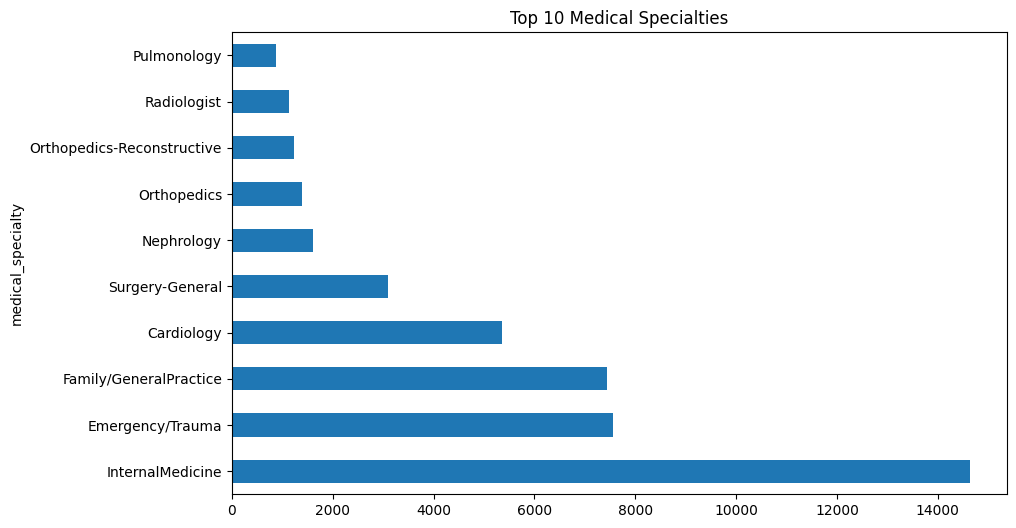

In [32]:
df["medical_specialty"].value_counts().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(10, 6))
plt.title("Top 10 Medical Specialties")

Text(0.5, 1.0, 'Readmission Rate by Medical Specialty')

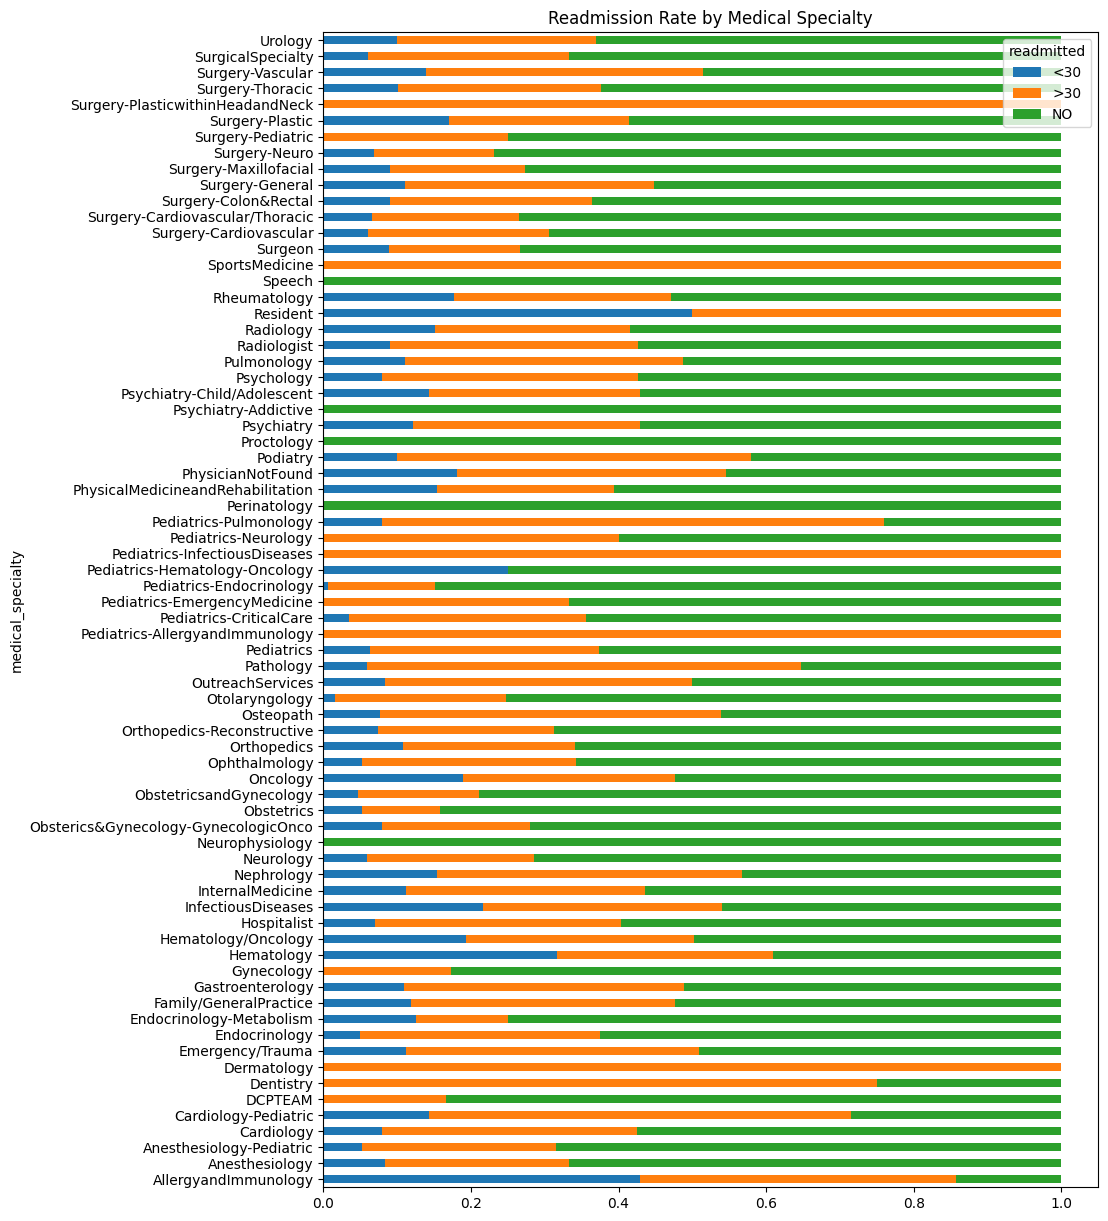

In [33]:
df.groupby("medical_specialty")["readmitted"].value_counts(normalize=True).unstack().plot(kind="barh", figsize=(10, 15), stacked=True)
plt.title("Readmission Rate by Medical Specialty")

**Note** : Replace medical_specialty missing value by unknown

In [34]:
df["medical_specialty"] = df["medical_specialty"].fillna("Unknown")
df["medical_specialty"].unique()

array(['Pediatrics-Endocrinology', 'Unknown', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicin

In [35]:
df["medical_specialty"].isna().sum()

np.int64(0)

**payer_code:** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay

<Axes: ylabel='race'>

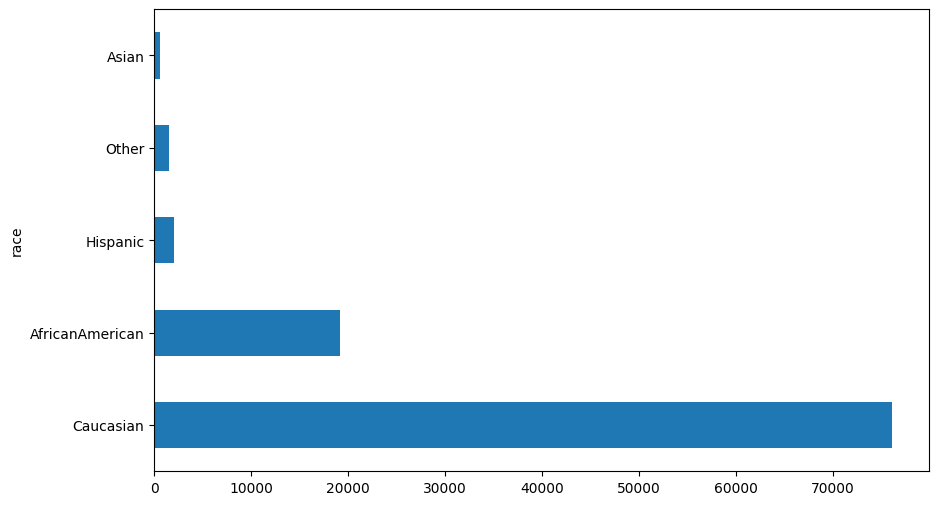

In [36]:
df["race"].value_counts().sort_values(ascending=False).plot(kind="barh", figsize=(10, 6))

In [37]:
df["race"] = df["race"].fillna("Other")

In [38]:
df.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamid

In [39]:
df.dropna(subset=["diag_1", "diag_2", "diag_3"], inplace=True)
df.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamid

In [40]:
df["gender"] = df["gender"].replace({"Unknown/Invalid": np.nan})
df["gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [42]:
df.dropna(subset=["gender"], inplace=True)

In [43]:
check_missing_values(df)

admission_type    5.186501
dtype: float64

In [44]:
df["admission_type"].value_counts()

admission_type
Emergency        53230
Elective         18544
Urgent           18203
Not Available     4719
Not Mapped         315
Trauma Center       21
Newborn             10
Name: count, dtype: int64

In [45]:
df["admission_type"] = df["admission_type"].fillna("Not Mapped")
df["admission_type"].unique()

array(['Emergency', 'Urgent', 'Elective', 'Not Mapped', 'Newborn',
       'Not Available', 'Trauma Center'], dtype=object)

In [46]:
discharge_disposition_id = { 1 : 'Discharged to home'
, 2 : 'Discharged/transferred to another short term hospital'
, 3 : 'Discharged/transferred to SNF'
, 4 : 'Discharged/transferred to ICF'
, 5 : 'Discharged/transferred to another type of inpatient care institution'
, 6 : 'Discharged/transferred to home with home health service'
, 7 : 'Left AMA'
, 8 : 'Discharged/transferred to home under care of Home IV provider'
, 9 : 'Admitted as an inpatient to this hospital'
, 10 : 'Neonate discharged to another hospital for neonatal aftercare'
, 11 : 'Expired'
, 12 : 'Still patient or expected to return for outpatient services'
, 13 : 'Hospice / home'
, 14 : 'Hospice / medical facility'
, 15 : 'Discharged/transferred within this institution to Medicare approved swing bed'
, 16 : 'Discharged/transferred/referred another institution for outpatient services'
, 17 : 'Discharged/transferred/referred to this institution for outpatient services'
, 18 : 'NULL'
, 19 : 'Expired at home. Medicaid only, hospice'
, 20 : 'Expired in a medical facility. Medicaid only, hospice'
, 21 : 'Expired, place unknown. Medicaid only, hospice'
, 22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital'
, 23 : 'Discharged/transferred to a long term care hospital'
, 24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare'
, 25 : 'Not Mapped'
, 26 : 'Unknown/Invalid'
, 30 : 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
, 27 : 'Discharged/transferred to a federal health care facility'
, 28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital'
, 29 : 'Discharged/transferred to a Critical Access Hospital (CAH)' }


admission_source_id = { 1 : 'Physician Referral'
, 2 : 'Clinic Referral'
, 3 : 'HMO Referral'
, 4 : 'Transfer from a hospital'
, 5 : 'Transfer from a Skilled Nursing Facility (SNF)'
, 6 : 'Transfer from another health care facility'
, 7 : 'Emergency Room'
, 8 : 'Court/Law Enforcement'
, 9 :  'Not Available'
, 10 : 'Transfer from critial access hospital'
, 11 : 'Normal Delivery'
, 12 : 'Premature Delivery'
, 13 : 'Sick Baby'
, 14 : 'Extramural Birth'
, 15 : 'Not Available'
, 17 : 'NULL'
, 18 : 'Transfer From Another Home Health Agency'
, 19 : 'Readmission to Same Home Health Agency'
, 20 : 'Not Mapped'
, 21 : 'Unknown/Invalid'
, 22 : 'Transfer from hospital inpt/same fac reslt in a sep claim'
, 23 : 'Born inside this hospital'
, 24 : 'Born outside this hospital'
, 25 : 'Transfer from Ambulatory Surgery Center'
, 26 : 'Transfer from Hospice'
                      }

In [47]:
df['discharge_disposition'] = df['discharge_disposition_id'].map(discharge_disposition_id)
df['admission_source'] = df['admission_source_id'].map(admission_source_id)

In [48]:
df.to_csv("data/diabetic_cleaned.csv", index=False)

In [49]:
del df
del diabetic